In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
gapminder = pd.read_csv("data/gapminder.csv", sep="\t")
print(gapminder.shape)
gapminder.head()

(1704, 6)


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [12]:
diamonds = pd.read_csv("data/diamonds.csv", sep=",")
print(diamonds.shape)
diamonds.head()

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
mpg = pd.read_csv("data/auto-mpg.csv", sep=",")
print(mpg.shape)
mpg.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


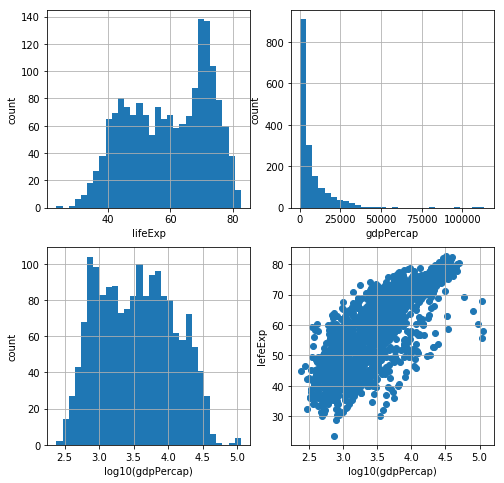

In [18]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
gapminder.lifeExp.hist(ax=ax1, bins=30)
ax1.set_xlabel('lifeExp')
ax1.set_ylabel('count')
gapminder.gdpPercap.hist(ax=ax2, bins=30)
ax2.set_xlabel('gdpPercap')
ax2.set_ylabel('count')
np.log10(gapminder.gdpPercap).hist(ax=ax3, bins=30)
ax3.set_xlabel('log10(gdpPercap)')
ax3.set_ylabel('count')
ax4.scatter(x=np.log10(gapminder.gdpPercap), y=gapminder.lifeExp)
ax4.set_xlabel('log10(gdpPercap)')
ax4.set_ylabel('lefeExp')
ax4.grid()
# TODO: add smoothed curve
plt.show()


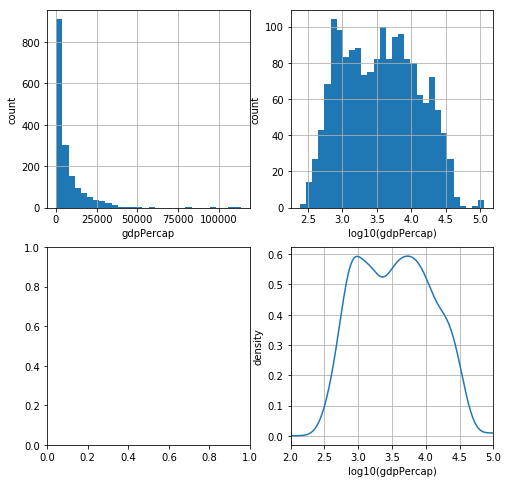

In [21]:


f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
gapminder.gdpPercap.hist(ax=ax1, bins=30)
ax1.set_xlabel('gdpPercap')
ax1.set_ylabel('count')

np.log10(gapminder.gdpPercap).hist(ax=ax2, bins=30)
ax2.set_xlabel('log10(gdpPercap)')
ax2.set_ylabel('count')

# No freqpoly in matplotlib
np.log10(gapminder.gdpPercap).plot.density(ax=ax4)
ax4.set_xlabel('log10(gdpPercap)')
ax4.set_ylabel('density')
ax4.set_xlim(2, 5.0)
# ... since default xlim is too wide
# ... since default doesn't have grid lines
ax4.grid(True)


0            Ideal
1          Premium
2             Good
3          Premium
4             Good
5        Very Good
6        Very Good
7        Very Good
8             Fair
9        Very Good
10            Good
11           Ideal
12         Premium
13           Ideal
14         Premium
15         Premium
16           Ideal
17            Good
18            Good
19       Very Good
20            Good
21       Very Good
22       Very Good
23       Very Good
24       Very Good
25       Very Good
26         Premium
27       Very Good
28       Very Good
29       Very Good
           ...    
53910      Premium
53911      Premium
53912      Premium
53913         Good
53914         Good
53915        Ideal
53916         Good
53917    Very Good
53918      Premium
53919        Ideal
53920    Very Good
53921    Very Good
53922    Very Good
53923        Ideal
53924        Ideal
53925        Ideal
53926        Ideal
53927         Good
53928      Premium
53929        Ideal
53930      Premium
53931      P

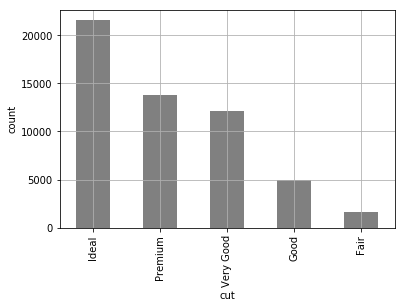

In [25]:
x = diamonds.cut.value_counts()
print(diamonds.cut)
plt.figure()
x.plot.bar(color='gray')
# ... diamonds.cut.plot.bar() doesn't work, since Series.plot.bar() doesn't do frequency calc.
# ... without color= argument, each level is shown in different colors
plt.grid(True)
plt.xlabel("cut")
plt.ylabel("count")
plt.show()
# ... since default doesn't have grid lines


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

        modelyear      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


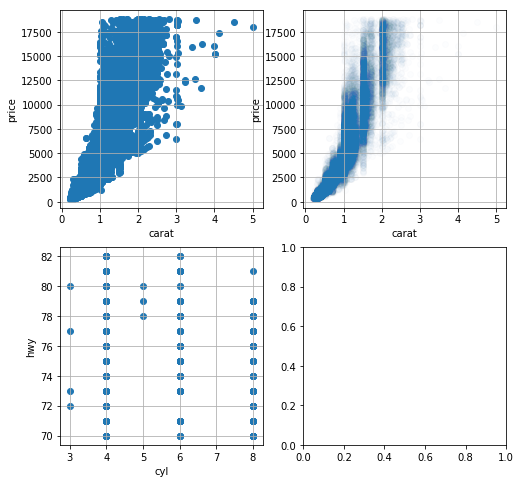

In [48]:
mpg.columns = mpg.columns.str.replace(' ','')
print(mpg.describe())
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
ax1.scatter(diamonds.carat, diamonds.price)
ax1.grid(True)
ax1.set_xlabel("carat")
ax1.set_ylabel("price")
ax2.scatter(diamonds.carat, diamonds.price, alpha=.01)
ax2.grid(True)
ax2.set_xlabel("carat")
ax2.set_ylabel("price")
ax3.scatter(mpg.cylinders, mpg.modelyear)
ax3.grid(True)
ax3.set_xlabel("cyl")
ax3.set_ylabel("hwy")
plt.show()
# TODO: add Jittered plot

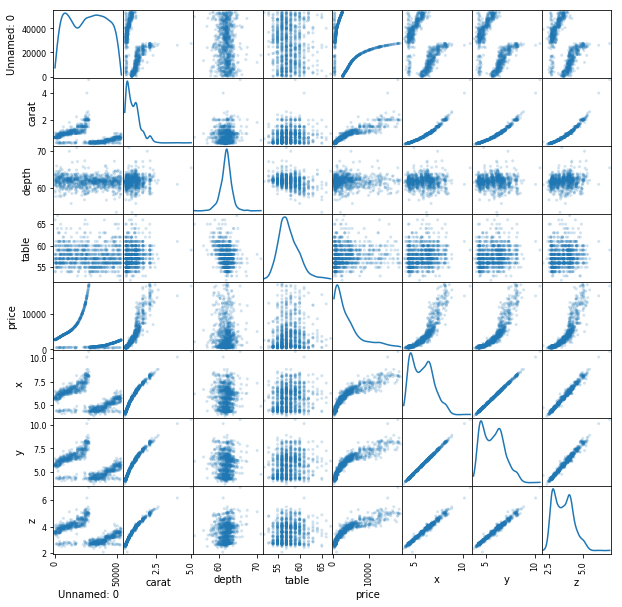

In [50]:
from pandas.plotting import scatter_matrix
df = diamonds.sample(n=1000)
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

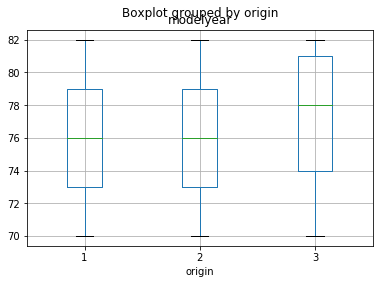

In [54]:
mpg.boxplot("modelyear", by="origin")
plt.show()

In [72]:
titanic = pd.read_csv('data/gender_submission.csv')
tf = pd.read_csv('data/train.csv')
tf.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [132]:
tf.iloc[1:10,2:5]
plt.figure()
tf['a_group'] = tf.Age<20

tf.pivot('Age','Survived')

ValueError: Index contains duplicate entries, cannot reshape

<Figure size 432x288 with 0 Axes>